In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_reconstruct import *
from data_reconstruct.backend import *
from data_reconstruct.examples import *
from data_reconstruct.utilities import *

In [3]:
random_state = 42
np.random.seed(random_state)

# Load Data

In [4]:
# Read
mod1 = pd.read_csv('data/decennial_2020_nov8GAN.csv')[1:]
mod2 = pd.read_csv('data/public_150k_plus_210630.csv')
mod1_tagged = process_decennial(mod1)
mod2_tagged = process_ppp(mod2, extended=False)  # Limited dataset
mod1, mod1_cols, mod1_tags_cols = mod1_tagged
mod2, mod2_cols, mod2_tags_cols = mod2_tagged

# Merge
mod1, mod2, annotations = merge_data(mod1_tagged, mod2_tagged, agg_by_tag=True)

# Sample
num_samples = min(mod1.shape[0], 2000)
mod1_sample = mod1.sample(num_samples, random_state=random_state)
mod2_sample = mod2.sample(num_samples, random_state=random_state)
annotations_sample = annotations.sample(num_samples, random_state=random_state);

# Generate Merged Anonymous Records

In [5]:
anonymized_data_5 = anonymize(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    embedding_dim=5,
    embedding_kwargs={
        'project_mode': 'tsne',
        'epoch_pd': 10000,
        'log_pd': 600,
        'epoch_DNN': 300,
        'log_DNN': 100,
    },
)

use random seed: 666
Shape of Raw data
Dataset 0: (729, 6)
Dataset 1: (729, 4)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[600/10000] err:0.1996 alpha:0.5643
epoch:[1200/10000] err:0.2789 alpha:0.8077
epoch:[1800/10000] err:0.3205 alpha:0.9726
epoch:[2400/10000] err:0.3335 alpha:1.0901
epoch:[3000/10000] err:0.3270 alpha:1.1843
epoch:[3600/10000] err:0.3122 alpha:1.2610
epoch:[4200/10000] err:0.3108 alpha:1.2654
epoch:[4800/10000] err:0.3554 alpha:1.1933
epoch:[5400/10000] err:0.3865 alpha:1.1167
epoch:[6000/10000] err:0.3923 alpha:1.1147
epoch:[6600/10000] err:0.3943 alpha:1.1177
epoch:[7200/10000] err:0.3973 alpha:1.1266
epoch:[7800/10000] err:0.3988 alpha:1.1302
epoch:[8400/10000] err:0.3980 alpha:1.1277
epoch:[9000/10000] err:0.3955 alpha:1.1205
epoch:[9600/10000] err:0.3984 alpha:1.1286
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[100/300]: loss:4.160594, align_loss:0.6

In [6]:
anonymized_data_10 = anonymize(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    embedding_dim=10,
    embedding_kwargs={
        'project_mode': 'tsne',
        'epoch_pd': 10000,
        'log_pd': 600,
        'epoch_DNN': 300,
        'log_DNN': 100,
    },
)

use random seed: 666
Shape of Raw data
Dataset 0: (729, 6)
Dataset 1: (729, 4)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[600/10000] err:0.1996 alpha:0.5643
epoch:[1200/10000] err:0.2789 alpha:0.8077
epoch:[1800/10000] err:0.3205 alpha:0.9726
epoch:[2400/10000] err:0.3335 alpha:1.0901
epoch:[3000/10000] err:0.3270 alpha:1.1843
epoch:[3600/10000] err:0.3122 alpha:1.2610
epoch:[4200/10000] err:0.3108 alpha:1.2654
epoch:[4800/10000] err:0.3554 alpha:1.1933
epoch:[5400/10000] err:0.3865 alpha:1.1167
epoch:[6000/10000] err:0.3923 alpha:1.1147
epoch:[6600/10000] err:0.3943 alpha:1.1177
epoch:[7200/10000] err:0.3973 alpha:1.1266
epoch:[7800/10000] err:0.3988 alpha:1.1302
epoch:[8400/10000] err:0.3980 alpha:1.1277
epoch:[9000/10000] err:0.3955 alpha:1.1205
epoch:[9600/10000] err:0.3984 alpha:1.1286
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[100/300]: loss:3.603476, align_loss:0.6

In [7]:
anonymized_data_50 = anonymize(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    embedding_dim=50,
    embedding_kwargs={
        'project_mode': 'tsne',
        'epoch_pd': 10000,
        'log_pd': 600,
        'epoch_DNN': 300,
        'log_DNN': 100,
    },
)

use random seed: 666
Shape of Raw data
Dataset 0: (729, 6)
Dataset 1: (729, 4)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[600/10000] err:0.1996 alpha:0.5643
epoch:[1200/10000] err:0.2789 alpha:0.8077
epoch:[1800/10000] err:0.3205 alpha:0.9726
epoch:[2400/10000] err:0.3335 alpha:1.0901
epoch:[3000/10000] err:0.3270 alpha:1.1843
epoch:[3600/10000] err:0.3122 alpha:1.2610
epoch:[4200/10000] err:0.3108 alpha:1.2654
epoch:[4800/10000] err:0.3554 alpha:1.1933
epoch:[5400/10000] err:0.3865 alpha:1.1167
epoch:[6000/10000] err:0.3923 alpha:1.1147
epoch:[6600/10000] err:0.3943 alpha:1.1177
epoch:[7200/10000] err:0.3973 alpha:1.1266
epoch:[7800/10000] err:0.3988 alpha:1.1302
epoch:[8400/10000] err:0.3980 alpha:1.1277
epoch:[9000/10000] err:0.3955 alpha:1.1205
epoch:[9600/10000] err:0.3984 alpha:1.1286
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[100/300]: loss:2.579552, align_loss:0.3

# Preview Results

In [8]:
pd.DataFrame(anonymized_data_5[0], index=annotations_sample.iloc[:, 0])

,0,1,2,3,4
ProjectCountyName,,,,,
NESHOBA,-0.747629,-0.799931,-2.040301,-2.984718,-3.150348
CLEVELAND,2.623566,0.153653,-2.205921,1.066634,-0.542677
HUMBOLDT,1.697380,0.072830,-1.751709,0.568285,-0.544774
LAKE,1.806968,0.080471,-1.824470,0.606866,-0.574150
PENOBSCOT,1.248915,-1.531978,-0.556296,-0.709923,0.053720
...,...,...,...,...,...
BRAZOS,-0.235617,-0.745039,-2.218359,-2.627761,-3.033819
CASCADE,1.586690,-0.005459,-1.496282,0.614561,-0.277787
GUADALUPE,-0.865539,-0.613338,-1.790419,-2.614480,-2.748641


# Usability

## Arbitrary Statistic Prediction

In [9]:
target = np.sqrt(mod1_sample['totalpop_other'] * mod2_sample['HEALTH_CARE_PROCEED']).to_numpy().reshape((-1, 1))
source_raw = pd.concat([mod1_sample, mod2_sample], axis=1).to_numpy().astype(np.float32)

### Before Anonymization

Epoch:  50    Loss:  0.00133
Epoch: 100    Loss:  0.00130
Epoch: 150    Loss:  0.00129
Epoch: 200    Loss:  0.00128


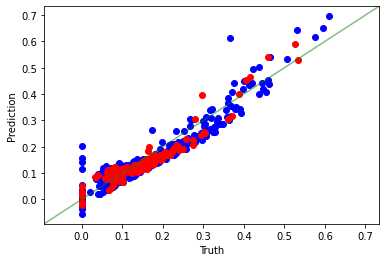

In [10]:
prediction, split_idx = predict_from_data(source_raw, target, nn_kwargs={'epochs': 200})
plot_example_results(target, prediction, split_idx=split_idx)

### After Anonymization

Epoch:  50    Loss:  0.00607
Epoch: 100    Loss:  0.00595
Epoch: 150    Loss:  0.00593
Epoch: 200    Loss:  0.00593
Epoch:  50    Loss:  0.00562
Epoch: 100    Loss:  0.00546
Epoch: 150    Loss:  0.00542
Epoch: 200    Loss:  0.00539
Epoch:  50    Loss:  0.00482
Epoch: 100    Loss:  0.00440
Epoch: 150    Loss:  0.00413
Epoch: 200    Loss:  0.00399


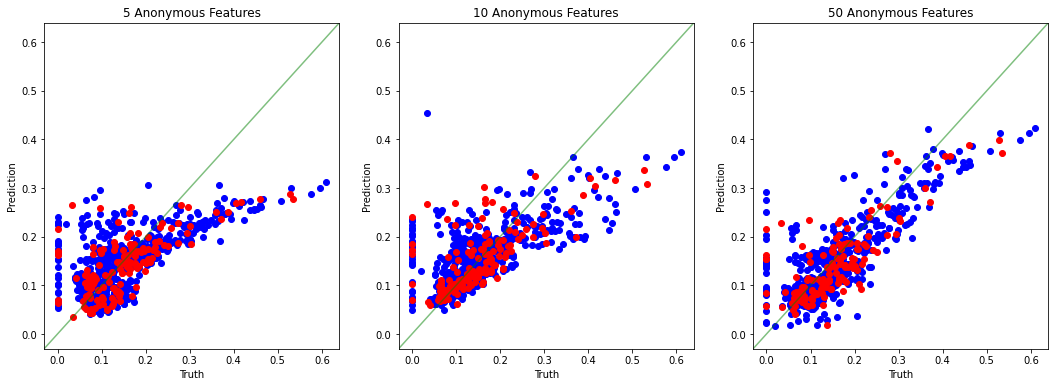

In [11]:
fig, axis = plt.subplots(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
plt.title('5 Anonymous Features')
prediction, split_idx = predict_from_data(anonymized_data_5[0], target, nn_kwargs={'epochs': 200})
plot_example_results(target, prediction, split_idx=split_idx, ax=ax)

ax = plt.subplot(1, 3, 2)
plt.title('10 Anonymous Features')
prediction, split_idx = predict_from_data(anonymized_data_10[0], target, nn_kwargs={'epochs': 200})
plot_example_results(target, prediction, split_idx=split_idx, ax=ax)

ax = plt.subplot(1, 3, 3)
plt.title('50 Anonymous Features')
prediction, split_idx = predict_from_data(anonymized_data_50[0], target, nn_kwargs={'epochs': 200})
plot_example_results(target, prediction, split_idx=split_idx, ax=ax)